# Red Neuronal Perceptrón Multicapa en Keras

Implementación de una red neuronal artificial de arquitectura perceptrón multicapa utilizando la interfaz de tensorflow y keras.
La aplicación utilizada para probar la implementación del modelo es la del reconocimiento de dígitos escritos a mano, MNIST.

Autor: M. en C. Mario Xavier Canche Uc, Agosto 2020, mario.canche@cimat.mx

Basado en: https://www.cimat.mx/~mrivera/cursos/aprendizaje_profundo/nn_multicapa/nn_multicapa.html

## Cargamos las librerias

In [1]:
# Librerias de tensorflow y keras
import tensorflow.keras as K
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras.utils import to_categorical

# librerias para definir el modelo
from tensorflow.keras import models
from tensorflow.keras import layers

# Cargar la interfaz a la base de datos que vienen con keras
from tensorflow.keras.datasets import mnist

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 
import time
import numpy as np

In [2]:
# Imprimimos información del equipo donde se procesara
print('backend :', K.backend.backend())
print('keras version :', K.__version__)
print('tensorflow version :', tf.__version__)
print("-------")
print(device_lib.list_local_devices())

backend : tensorflow
keras version : 2.2.4-tf
tensorflow version : 2.1.0
-------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17124314183588558751
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4868829157542645878
physical_device_desc: "device: XLA_CPU device"
]


## Cargamos la base de datos MNIST

In [3]:
# Lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

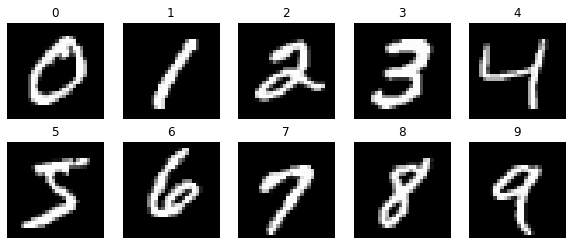

In [4]:
# Visualizamos una muestra de los datos
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels).index(i)
    plt.imshow(train_images[idx], 'gray')
    plt.title(train_labels[idx])
    plt.axis('off')
    
plt.show()

In [5]:
# Prepocesamiento de los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

numIm, szIm = train_images.shape
print("Número de muestras:     ", numIm)
print("Tamaño de cada muestra: ", szIm)

Número de muestras:      60000
Tamaño de cada muestra:  784


In [6]:
# Preprocesamiento de las etiquetas
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

## Definimos la Arquitectura de la Red

In [7]:
# Arquitectura de la red
nn = models.Sequential()    
nn.add(layers.Dense(units=512,activation='relu', input_shape=(szIm,)))         
nn.add(layers.Dense(units=10, activation='softmax'))

In [8]:
# Agregamos el optimizador y las metricas de evaluacion
nn.compile(optimizer='rmsprop',
           loss     ='categorical_crossentropy',
           metrics  =['accuracy'])

## Entrenamos el Modelo

In [9]:
# Entrenamos la red
tic=time.time()
history = nn.fit(x = train_images, 
                 y = train_labels, 
                 validation_split=0.2,
                 epochs    = 10, 
                 shuffle   = True,
                 batch_size = 128,
                 verbose=2)
print('Tiempo: {} secs'.format(time.time()-tic))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 3s - loss: 0.2833 - accuracy: 0.9182 - val_loss: 0.1435 - val_accuracy: 0.9600
Epoch 2/10
48000/48000 - 2s - loss: 0.1171 - accuracy: 0.9657 - val_loss: 0.1043 - val_accuracy: 0.9683
Epoch 3/10
48000/48000 - 2s - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0855 - val_accuracy: 0.9733
Epoch 4/10
48000/48000 - 2s - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.0798 - val_accuracy: 0.9769
Epoch 5/10
48000/48000 - 2s - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0781 - val_accuracy: 0.9776
Epoch 6/10
48000/48000 - 2s - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0809 - val_accuracy: 0.9776
Epoch 7/10
48000/48000 - 2s - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0801 - val_accuracy: 0.9790
Epoch 8/10
48000/48000 - 2s - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.0846 - val_accuracy: 0.9790
Epoch 9/10
48000/48000 - 3s - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0824 - val_accuracy: 0.9805
Epoch 10/10
48

In [10]:
# Evaluamos el conjunto de test
results = nn.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0723 - accuracy: 0.9812
[0.07227691715878028, 0.9812]


## Graficamos la matriz de confusión

In [11]:
test_predicted_labels = nn.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

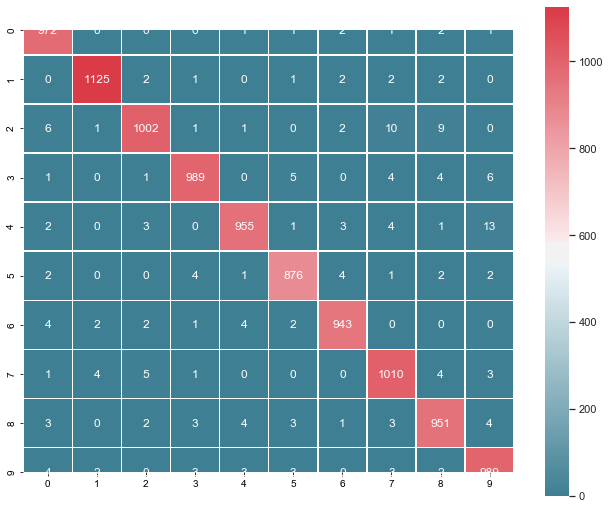

In [12]:
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
#ax.set_title('Matriz de Confusión')
plt.show()